In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from sklearn.metrics import silhouette_score
import math
import datetime as dt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model


## Klasörlere ayırma  
- Hiyerarşik class yapısını rastgele bir şekilde oluşturmak için yapıyoruz. Bu işlem sonunda elimizdeki klasör yapısı:
    - Train
        - 0 (cats)
        - 1 (dogs)
    - Val
        - 0 (cats)
        - 1 (dogs)
    - Test1

In [13]:
import os
import shutil
import random

rootdir= 'C:\\Users\\user\\Documents\\myPython\\ecodation\\dogs-cats\\train\\' #path of the original folder
new_root = "C:\\Users\\user\\Documents\\myPython\\ecodation\\O1"

classes = ["0", "1"]

val_ratio = 0.15
test_ratio = 0.05

for cls in classes:
    os.makedirs(new_root +'train\\' + cls)
    os.makedirs(new_root +'val\\' + cls)
   

    src = rootdir + cls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio)))])

    train_FileNames = [src+'\\'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'\\' + name for name in val_FileNames.tolist()]
   

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, new_root +'train\\' + cls)

    for name in val_FileNames:
        shutil.copy(name, new_root +'val\\' + cls)


Total images:  12500
Training:  10000
Validation:  2500
Total images:  12500
Training:  10000
Validation:  2500


Klasör pathlerini oluşturma

In [2]:
train_data_dir= 'C:\\Users\\user\\Documents\\myPython\\ecodation\\cats-vs-dogs\\train\\'
val_data_dir = 'C:\\Users\\user\\Documents\\myPython\\ecodation\\cats-vs-dogs\\val\\'
test_data_dir='C:\\Users\\user\\Documents\\myPython\\ecodation\\cats-vs-dogs\\test1\\'

## Flow from directory ile train,val ve testi oluşturma

In [3]:
from keras.preprocessing.image import ImageDataGenerator

batch_size=32
img_rows = 224
img_cols = 224

train_datagen=ImageDataGenerator(
    rotation_range=5,
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2,
    fill_mode='nearest'
    )

train_generator=train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows,img_cols),
    batch_size=batch_size,
    class_mode='categorical')


validation_generator=train_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_rows,img_cols),
    batch_size=batch_size,
    class_mode='categorical')


test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_rows,img_cols),
    batch_size=batch_size,
    class_mode="categorical",
    seed=42
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


## CNN Modelini inşa etme

In [4]:
input_shape=(img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax')) 

In [5]:
model.compile(
    optimizer= 'Adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

In [6]:
epochs=5
history = model.fit(
    train_generator, 
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/5
625/625 [==============================] - 2431s 4s/step - loss: 0.9102 - accuracy: 0.6100 - val_loss: 0.6542 - val_accuracy: 0.6516
Epoch 2/5
625/625 [==============================] - 2278s 4s/step - loss: 0.5515 - accuracy: 0.7241 - val_loss: 0.9850 - val_accuracy: 0.6328
Epoch 3/5
625/625 [==============================] - 2401s 4s/step - loss: 0.4809 - accuracy: 0.7706 - val_loss: 0.5575 - val_accuracy: 0.7320
Epoch 4/5
625/625 [==============================] - 24057s 39s/step - loss: 0.4463 - accuracy: 0.7896 - val_loss: 0.4720 - val_accuracy: 0.7728
Epoch 5/5
625/625 [==============================] - 2289s 4s/step - loss: 0.4370 - accuracy: 0.7981 - val_loss: 0.7268 - val_accuracy: 0.7184


### Eğitim sonuçlarını görselleştirme

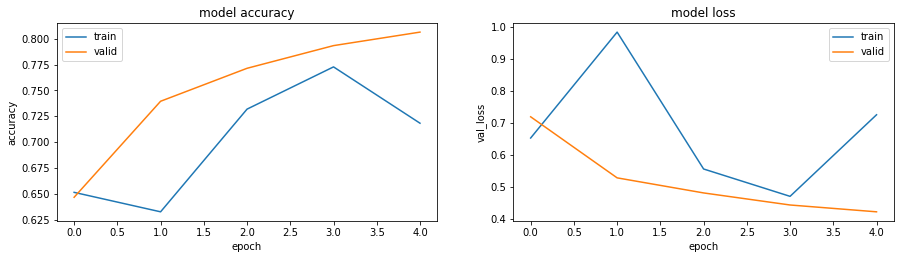

In [7]:
plt.figure(1, figsize = (15,8))
   
plt.subplot(221)  
plt.plot(history.history['val_accuracy'])  
plt.plot(history.history['accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['val_loss'])  
plt.plot(history.history['loss'])  
plt.title('model loss')  
plt.ylabel('val_loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [24]:
performans = model.evaluate_generator(generator=validation_generator, steps=validation_generator.batch_size)
print('modelin test performansı %.2f%% ' % (performans[1]*100))

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


modelin test performansı 72.27% 


## Resnet152V2 model ile tranfer learning

In [26]:
def layer_adder(bottom_model,num_classes):
    top_model=bottom_model.output
    top_model=GlobalAveragePooling2D()(top_model)
    top_model=Dense(1024,activation='relu')(top_model)
    top_model=Dropout(0.3)(top_model)
    top_model=Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [28]:
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Model

img_rows, img_cols = 224,224

model2 = ResNet152V2(weights = "imagenet",
                   include_top = False,
                   input_shape =(img_rows,img_cols, 3))
for layer in model2.layers:
    layer.trainable=False #katmanları dondur



num_classes=2
FC_Head=layer_adder(model2,num_classes)
model2=Model(inputs=model2.input,outputs=FC_Head)
print(model2.summary())#bu çalışcak

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [29]:
model2.compile(
    optimizer= 'Adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

epochs=5
history = model2.fit(
    train_generator, 
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/5
625/625 [==============================] - 6357s 10s/step - loss: 0.0778 - accuracy: 0.9793 - val_loss: 0.0501 - val_accuracy: 0.9832
Epoch 2/5
625/625 [==============================] - 6368s 10s/step - loss: 0.0457 - accuracy: 0.9840 - val_loss: 0.0430 - val_accuracy: 0.9830
Epoch 3/5
625/625 [==============================] - 6366s 10s/step - loss: 0.0340 - accuracy: 0.9880 - val_loss: 0.0333 - val_accuracy: 0.9866
Epoch 4/5
625/625 [==============================] - 6358s 10s/step - loss: 0.0340 - accuracy: 0.9881 - val_loss: 0.0356 - val_accuracy: 0.9860
Epoch 5/5
625/625 [==============================] - 6729s 11s/step - loss: 0.0312 - accuracy: 0.9894 - val_loss: 0.0401 - val_accuracy: 0.9856


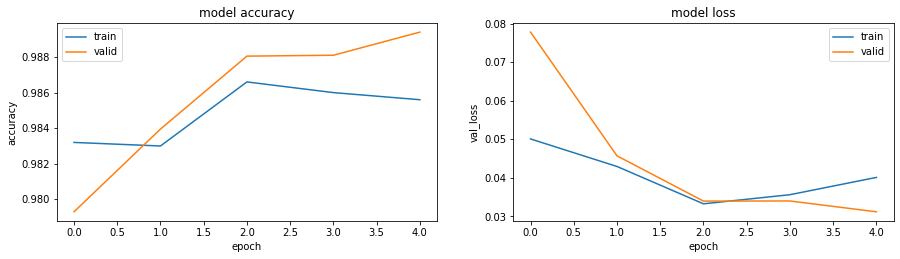

In [30]:
plt.figure(1, figsize = (15,8))
   
plt.subplot(221)  
plt.plot(history.history['val_accuracy'])  
plt.plot(history.history['accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['val_loss'])  
plt.plot(history.history['loss'])  
plt.title('model loss')  
plt.ylabel('val_loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [33]:
performans = model2.evaluate_generator(generator=validation_generator, steps=validation_generator.batch_size)
print('modelin test performansı %.2f%% ' % (performans[1]*100))

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


modelin test performansı 99.12% 


# Sonuç

- Kendi oluşturduğum CNN modelinin test başarısı : %72.27
- Transfer learning  kullanarak eğittiğim Resnet152V2 modelinin test başarısı : %99.12